In [ ]:
# Installing 'binance-futures-connector'
# pip install binance-futures-connector
# from binance.futures import Futures 

In [ ]:
# Installing 'Binance_Futures_python'
# # !git clone https://github.com/Binance-docs/Binance_Futures_python.git
# # print('cloned')
# # python3 setup.py install
# import binance_f  # For perpetual swap
# import binance_d  # For delivery futures

# USDT-M Futures - fapi.binance.com
# COIN-M Delivery -  dapi.binance.com

In [ ]:
API_Key = 'sample_api'
Secret_Key = 'sample_sec_api'
API_Key_T = '1d686436da90782146a9bb4fc13f5fa2f56bc05a336702884b142bef5be8c6cd' # Testnet futures https://testnet.binancefuture.com/en/futures/BTCUSDT
Secret_Key_T = 'cdd334a99ec258c0f6ad69734d08ff11791b728b2d1ac624bea3c5d4eea3b3b9'

In [ ]:
Signature: client.new_order(symbol: str, side: str, type: str, **kwargs)
Docstring:
|
| **New Order (TRADE)**
| *Send a new order*

:API endpoint: ``POST /fapi/v1/order``
:API doc: https://binance-docs.github.io/apidocs/futures/en/#new-order-trade

:parameter symbol: string
:parameter side: string
:parameter type: string
:parameter positionSide: optional string. Default BOTH for One-way Mode; LONG or SHORT for Hedge Mode. It must be passed in Hedge Mode.
:parameter timeInForce: optional string
:parameter quantity: optional float
:parameter reduceOnly: optional string
:parameter price: optional float
:parameter newClientOrderId: optional string. An unique ID among open orders. Automatically generated if not sent.
:parameter stopPrice: optional float. Use with STOP/STOP_MARKET or TAKE_PROFIT/TAKE_PROFIT_MARKET orders.
:parameter closePosition: optional string. true or false; Close-All, use with STOP_MARKET or TAKE_PROFIT_MARKET.
:parameter activationPrice: optional float. Use with TRAILING_STOP_MARKET orders, default is the latest price (supporting different workingType).
:parameter callbackRate: optional float. Use with TRAILING_STOP_MARKET orders, min 0.1, max 5 where 1 for 1%.
:parameter workingType: optional string. stopPrice triggered by: "MARK_PRICE", "CONTRACT_PRICE". Default "CONTRACT_PRICE".
:parameter priceProtect: optional string. "TRUE" or "FALSE", default "FALSE". Use with STOP/STOP_MARKET or TAKE_PROFIT/TAKE_PROFIT_MARKET orders.
:parameter newOrderRespType: optional float. "ACK" or "RESULT", default "ACK".
:parameter recvWindow: optional int

In [ ]:
'''''''''
This worked and placed one order
'''''''''
from binance.futures import Futures 

client = Futures()
print(client.time())

client = Futures(key=API_Key_T, secret=Secret_Key_T, base_url= "https://testnet.binancefuture.com")

# Get account information
print(client.account(), "- is this printed")

# Post a new order
params = {
    'symbol': 'BTCUSDT',
    'side': 'BUY',
    'type': 'LIMIT',
    'timeInForce': 'GTC',
    'quantity': 0.002,
    'price': 38548,
}

response = client.new_order(**params)
print(response)


In [ ]:
# Getting Details about previous orders
response_order1 = client.query_order('BTCUSDT', orderId=3036728547)
response_order1, response_order1['status']

In [ ]:
from binance.websocket.futures.websocket_client import FuturesWebsocketClient as WebsocketClient

def message_handler(message):
    print(message)

ws_client = WebsocketClient()
ws_client.start()

ws_client.mini_ticker(
    symbol='bnbusdt',
    id=1,
    callback=message_handler,
)

# Combine selected streams
ws_client.instant_subscribe(
    stream=['bnbusdt@bookTicker', 'ethusdt@bookTicker'],
    callback=message_handler,
)

# ws_client.stop()


In [ ]:
# pip install tradingview_ta

In [ ]:
docker run -p 8080:8080 --rm reg2005/tradingview-ta-docker

In [ ]:
import logging
from binance.futures import Futures as Client
from binance.lib.utils import config_logging

config_logging(logging, logging.DEBUG)

futures_client = Client()
logging.info(futures_client.ping())

In [ ]:
# Go to Trading View, BTCUSDTPERP (symobl) , exchange (binance)
import logging
from binance.futures import Futures as Client
from binance.lib.utils import config_logging

config_logging(logging, logging.DEBUG)

futures_client = Client()

btcusdt_5m = logging.info(futures_client.klines("BTCUSDT", "5m"))

In [ ]:
'''''''''
This worked and fetched data correctly
'''''''''
btcbusd_5m=futures_client.klines("BTCBUSD", "5m") # Go to binance, derivatives, usd futures, btcbusd perpetual (https://www.binance.com/en-IN/futures/BTCBUSD)
btcbusd_5m # len(btcbusd_5m) - 500 # 1 day 17 hrsx`

In [ ]:
#1651693800000
btcusdt_5m[::-1][0] # getting lattest data, this candle is not closed,    btcusdt_5m[::-1][0] this candle is closed

In [ ]:
len(btcusdt_5m) # 1 day 17 hrs

In [ ]:
futures_client.klines("BTCUSDT", "5m")

In [ ]:
# output of above
[1651754400000,'39539.20','39540.90','39522.40','39538.30','229.192',1651754699999,'9060381.38510',2996,'123.740','4891750.11680'0'], 
[1651754700000,'39538.40','39550.00','39501.70','39517.90','329.564',1651754999999,'13025930.27350',4104,'177.951','7033420.16680'0'],
#  Open time,	Open,	High,	Low	,Close	,Volume	,Close time,	Quote asset volume	Number of trades	Taker buy base asset volume	Taker buy quote asset volume	Ignore
#  reading output https://github.com/binance/binance-public-data/

In [ ]:
# this function is important def continuous_klines(
# https://github.com/Binance-docs/binance-futures-connector-python/blob/main/binance/futures/market.py

In [ ]:
from binance.lib.utils import check_required_parameter
from binance.lib.utils import check_required_parameters
def continuous_klines(self, pair: str, contractType: str, interval: str, **kwargs):
    """
    |
    | **Continuous Kline/Candlestick Data**
    | *Kline/candlestick bars for a specific contract type. Klines are uniquely identified by their open time.*  
    
    :API endpoint: ``GET /fapi/v1/continuousKlines``
    :API doc: https://binance-docs.github.io/apidocs/futures/en/#continuous-contract-kline-candlestick-data
    :parameter pair: string; the trading pair.
    :parameter contractType: string; PERPETUAL, CURRENT_MONTH, NEXT_MONTH, CURRENT_QUARTER, NEXT_QUARTER.
    :parameter interval: string; the interval of kline, e.g 1m, 5m, 1h, 1d, etc. (see more in https://binance-docs.github.io/apidocs/futures/en/#public-endpoints-info)
    :parameter limit: optional int; limit the results. Default 500, max 1000.
    :parameter startTime: optional int
    :parameter endTime: optional int
    |
    """

    check_required_parameters([[pair, "pair"], [contractType,"contractType"], [interval, "interval"]])
    params = {"pair": pair, "contractType":contractType, "interval": interval, **kwargs}
    return self.query("/fapi/v1/continuousKlines", params)
from binance.futures import Futures as Client
continuous_klines_object = Client()
a= continuous_klines_object.continuous_klines("BTCUSDT","PERPETUAL",  "1m")[::-1][:21] # 1652122500000 lattest

In [55]:
# acessing functions
def ping(self):
    """
    |
    | **Test Connectivity**
    | *Test connectivity to the Rest API.*
    :API endpoint: ``GET /fapi/v1/ping``
    :API doc: https://binance-docs.github.io/apidocs/futures/en/#test-connectivity
    |
    """

    url_path = "/fapi/v1/ping"
    return self.query(url_path)
from binance.futures import Futures as Client
pping = Client()
pping.ping()

{}

In [2]:
from binance.lib.utils import check_required_parameter
from binance.lib.utils import check_required_parameters
from binance.futures import Futures as Client
import pandas as pd
import time
pd.set_option('display.max_rows', None)

In [3]:
continuous_klines_object = Client()

def continuous_klines(self, pair: str, contractType: str, interval: str, **kwargs):
    check_required_parameters([[pair, "pair"], [contractType,"contractType"], [interval, "interval"]])
    params = {"pair": pair, "contractType":contractType, "interval": interval, **kwargs}
    return self.query("/fapi/v1/continuousKlines", params)

def getRawData():
    return continuous_klines_object.continuous_klines("BTCUSDT","PERPETUAL",  "5m")[::-1][:21] # 1652122500000 lattest

In [ ]:
# Run this, it will update after every 1 minute, for this change "5m" to "1m" ^^^^^^ here above
first_time_stamp = 0


while 1:
    Raw_Data = pd.DataFrame(getRawData(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
    Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
    if first_time_stamp == Raw_Data_new['openTimeStamp'][0]:
        print('repeat1')
        pass
    else:
        print('repeat2')
        first_time_stamp = Raw_Data_new['openTimeStamp'][0]
        print(Raw_Data_new)
        time.sleep(10) # API is giving sometimes old data

repeat2
    openTimeStamp      open      high       low     close
0   1652299500000  29352.30  29422.80  29175.20  29184.50
1   1652299200000  29360.50  29655.00  29326.00  29352.40
2   1652298900000  29569.00  29597.60  29311.90  29360.50
3   1652298600000  29203.20  29576.30  29200.30  29568.90
4   1652298300000  29297.20  29415.00  29156.50  29203.10
5   1652298000000  29383.90  29480.40  29230.00  29301.90
6   1652297700000  29556.80  29586.00  29300.00  29383.80
7   1652297400000  29739.40  29815.00  29527.60  29556.70
8   1652297100000  29598.10  29862.50  29580.80  29742.40
9   1652296800000  29829.00  29848.90  29570.40  29598.00
10  1652296500000  29779.50  29955.60  29664.00  29828.70
11  1652296200000  29931.80  30042.00  29756.00  29779.40
12  1652295900000  29851.80  29971.60  29780.80  29931.80
13  1652295600000  29904.30  29978.50  29781.80  29851.90
14  1652295300000  29906.00  29956.80  29764.60  29904.40
15  1652295000000  29892.80  29965.20  29842.10  29905.90
16  16

In [ ]:
import time
print('hello')
time.sleep(5)
print('world')

In [29]:
Raw_Data = pd.DataFrame(getRawData(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
Raw_Datata_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
print(Raw_Datata_new)

    openTimeStamp      open      high       low     close
0   1652300400000  29182.10  29317.50  29050.60  29234.20
1   1652300100000  29086.50  29493.00  28870.00  29182.20
2   1652299800000  29187.40  29327.40  29071.70  29086.50
3   1652299500000  29352.30  29422.80  29169.90  29187.40
4   1652299200000  29360.50  29655.00  29326.00  29352.40
5   1652298900000  29569.00  29597.60  29311.90  29360.50
6   1652298600000  29203.20  29576.30  29200.30  29568.90
7   1652298300000  29297.20  29415.00  29156.50  29203.10
8   1652298000000  29383.90  29480.40  29230.00  29301.90
9   1652297700000  29556.80  29586.00  29300.00  29383.80
10  1652297400000  29739.40  29815.00  29527.60  29556.70
11  1652297100000  29598.10  29862.50  29580.80  29742.40
12  1652296800000  29829.00  29848.90  29570.40  29598.00
13  1652296500000  29779.50  29955.60  29664.00  29828.70
14  1652296200000  29931.80  30042.00  29756.00  29779.40
15  1652295900000  29851.80  29971.60  29780.80  29931.80
16  1652295600

In [30]:
print('openTimeStamp','  ', "high ",'    ', "low")
for i in range(1,11):
    print(Raw_Datata_new['openTimeStamp'][i],' ',Raw_Datata_new['high'][i], ' ',Raw_Datata_new['low'][i] ,"  ",i)

openTimeStamp    high       low
1652300100000   29493.00   28870.00    1
1652299800000   29327.40   29071.70    2
1652299500000   29422.80   29169.90    3
1652299200000   29655.00   29326.00    4
1652298900000   29597.60   29311.90    5
1652298600000   29576.30   29200.30    6
1652298300000   29415.00   29156.50    7
1652298000000   29480.40   29230.00    8
1652297700000   29586.00   29300.00    9
1652297400000   29815.00   29527.60    10


sum_high 	 sum_low

29493.0000 	 28870.0000 	 1
29327.4000 	 29071.7000 	 2
29422.8000 	 29169.9000 	 3
29655.0000 	 29326.0000 	 4
29597.6000 	 29311.9000 	 5
29576.3000 	 29200.3000 	 6
29415.0000 	 29156.5000 	 7
29480.4000 	 29230.0000 	 8
29586.0000 	 29300.0000 	 9
29815.0000 	 29527.6000 	 10
29536.0000 	 29216.3900 	 Final


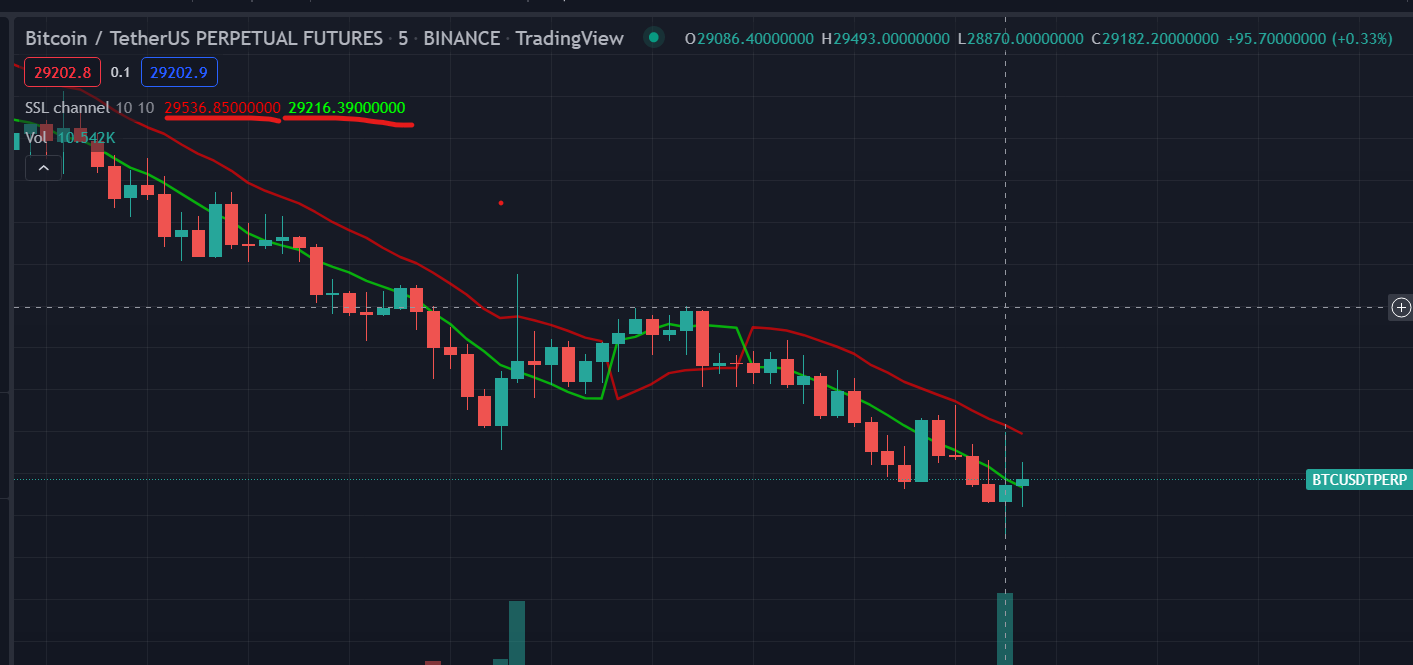

In [45]:
sum_high=0
sum_low=0
print('sum_high','\t','sum_low')
print('')
for i in range(1,11):
    sum_high += float(Raw_Datata_new['high'][i])
    sum_low += float(Raw_Datata_new['low'][i])
    print( "%.4f"%float(Raw_Datata_new['high'][i]),'\t', "%.4f"%float(Raw_Datata_new['low'][i]),'\t',i)
print( "%.4f"%int(sum_high/10),'\t', "%.4f"%float(sum_low/10),'\t','Final')
from IPython.display import Image
Image(filename =r'image.png')

In [4]:
continuous_klines_object500 = Client()

def getRawData500():
    return continuous_klines_object500.continuous_klines("BTCUSDT","PERPETUAL",  "5m")[::-1] # 1652122500000 lattest

In [8]:
# Run this, it will update after every 1 minute, for this change "5m" to "1m" ^^^^^^ here above
first_time_stamp = 0

Raw_Data = pd.DataFrame(getRawData500(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
Raw_Data_new['sslHigh']=0
Raw_Data_new['ssllow']=0
for i in range(499):
    sumhigh=0
    sumlow=0
    for j in range(10):
        sumlow += Raw_Data_new['low']
    sumlow=sumlow/10
Raw_Data_new

,openTimeStamp,open,high,low,close,sslHigh,ssllow
0,1652383200000,28452.10,28762.10,28437.70,28677.10,0,0
1,1652382900000,28321.20,28474.70,28270.00,28450.70,0,0
2,1652382600000,28466.20,28489.90,28267.10,28321.30,0,0
3,1652382300000,28532.00,28543.00,28405.00,28466.20,0,0
4,1652382000000,28334.60,28532.00,28285.50,28532.00,0,0
5,1652381700000,28312.40,28385.90,28242.60,28334.60,0,0
6,1652381400000,28225.10,28400.00,28161.30,28312.40,0,0
7,1652381100000,28346.10,28434.80,28187.30,28225.00,0,0
8,1652380800000,28317.50,28415.10,28235.10,28346.10,0,0
9,1652380500000,28422.30,28440.40,28283.00,28317.30,0,0


In [79]:
# Run this, it will update after every 1 minute, for this change "5m" to "1m" ^^^^^^ here above
first_time_stamp = 0

Raw_Data = pd.DataFrame(getRawData500(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)[:171]
Raw_Data_new['sslHigh']=0
Raw_Data_new['ssllow']=0
Raw_Data_new['high1low0']=0


sumhigh=0
sumlow=0
for i in range(150,0,-1):
    sumhigh=0
    sumlow=0
    for j in range(10):
        
        sumlow+=float(Raw_Data_new['low'][i+j-1])
        sumhigh+=float(Raw_Data_new['high'][i+j-1])

    Raw_Data_new['ssllow'][i-1]=sumhigh/10
    Raw_Data_new['sslHigh'][i-1]=sumlow/10
    if float(Raw_Data_new['ssllow'][i-1]) > float(Raw_Data_new['close'][i-1]):
        Raw_Data_new['high1low0'][i-1] = 0
    else:
        Raw_Data_new['high1low0'][i-1] = 1
#     for j in range(10):
#         Raw_Data_new[i]['sslHigh']
#     for j in range(10):
#         sumlow += float(Raw_Data_new['low'][490-j])
#         Raw_Data_new['ssllow'][490-j]=float(Raw_Data_new['low'][499-j])#float(sumlow/10)
# sumlow=sumlow/10
Raw_Data_new

C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,openTimeStamp,open,high,low,close,sslHigh,ssllow,high1low0
0,1652389500000,28472.10,28529.90,28439.50,28473.90,28626,28767,0
1,1652389200000,28598.90,28602.70,28464.20,28472.10,28634,28778,0
2,1652388900000,28685.40,28692.80,28578.00,28598.80,28635,28780,0
3,1652388600000,28748.20,28772.60,28660.30,28684.80,28631,28779,0
4,1652388300000,28772.70,28836.30,28741.00,28748.20,28623,28773,0
5,1652388000000,28836.50,28958.00,28759.50,28773.50,28611,28768,1
6,1652387700000,28710.00,28860.10,28695.40,28836.50,28590,28747,1
7,1652387400000,28840.00,28840.00,28668.20,28710.00,28566,28725,0
8,1652387100000,28721.70,28840.80,28686.00,28840.00,28541,28705,1
9,1652386800000,28619.50,28738.50,28577.10,28721.70,28518,28683,1


In [14]:
sumlow

283326.3

In [ ]:
1652380500000  - 1652380800000  